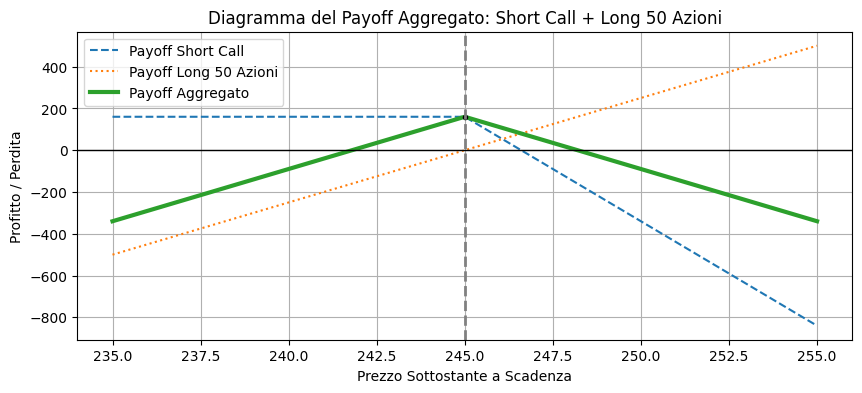

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
strike = 245              # Strike della call venduta
premio = 1.6              # Premio incassato per azione
moltiplicatore = 100      # Numero di azioni coperte da un contratto di opzione
quantità_long = 50        # Numero di azioni acquistate
prezzo_acquisto = 245     # Prezzo di acquisto delle azioni (prezzo attuale)

# Range dei prezzi dell'azione a scadenza
S = np.linspace(235, 255, 1000)

# Payoff della short call:
# Incasso iniziale: premio * 100, e perdita se l'opzione è in the money.
payoff_short_call = premio * moltiplicatore - np.maximum(S - strike, 0) * moltiplicatore

# Payoff della posizione long sulle azioni:
# Guadagno o perdita derivante dalla variazione del prezzo rispetto a 245.
payoff_long_stock = (S - prezzo_acquisto) * quantità_long

# Payoff aggregato
payoff_totale = payoff_short_call + payoff_long_stock

# Calcolo del payoff al prezzo attuale ("at now")
indice_corrente = np.argmin(np.abs(S - prezzo_acquisto))
payoff_atnow = payoff_totale[indice_corrente]

# Creazione del grafico
plt.figure(figsize=(10, 4))
plt.plot(S, payoff_short_call, label='Payoff Short Call', linestyle='--')
plt.plot(S, payoff_long_stock, label='Payoff Long 50 Azioni', linestyle=':')
plt.plot(S, payoff_totale, label='Payoff Aggregato', linewidth=3)
plt.plot(prezzo_acquisto, payoff_atnow, 'ko', markersize=3)
plt.axvline(prezzo_acquisto, color='grey', linestyle='--', linewidth=2)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Prezzo Sottostante a Scadenza')
plt.ylabel('Profitto / Perdita')
plt.title('Diagramma del Payoff Aggregato: Short Call + Long 50 Azioni')
plt.legend()
plt.grid(True)
plt.show()
